In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski, Crippen
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#from physiochem_properties import get_physicochemical_properties

def calculate_descriptors(smiles_list):
    data = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            # Handle cases where SMILES cannot be parsed.
            continue

        descriptors = {
            "Chiral": len(Chem.FindMolChiralCenters(mol, includeUnassigned=True)),
            "MolWt": round(Descriptors.MolWt(mol), 3),
            "HeavyAtoms": Lipinski.HeavyAtomCount(mol),
            "HAcceptors": Lipinski.NumHAcceptors(mol),
            "HDonors": Lipinski.NumHDonors(mol),
            "LogP": round(Crippen.MolLogP(mol), 3),
            "TPSA": round(Descriptors.TPSA(mol), 3),
            "AromaticAtoms": sum([1 for atom in mol.GetAtoms() if atom.GetIsAromatic()]),
            "FormalCharge": sum([atom.GetFormalCharge() for atom in mol.GetAtoms()]),
            "NumRings": rdMolDescriptors.CalcNumRings(mol),
            "FractionCSP3": round(Descriptors.FractionCSP3(mol), 3),
            "Halogens": Chem.Fragments.fr_halogen(mol),
            "MR": round(Crippen.MolMR(mol), 3),
            # Element-specific atom counts (e.g., N, O) can be added similarly
            "NumN": sum([1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7]),
            "NumO": sum([1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 8]),
        }
        data.append(descriptors)
    return pd.DataFrame(data)

def clalculate_descriptors_old(smiles_list):
    data = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        descriptors = {
            "MolWt": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHAcceptors": Descriptors.NumHAcceptors(mol),
            "NumHDonors": Descriptors.NumHDonors(mol),
            "NumHeavyAtoms": rdMolDescriptors.CalcNumHeavyAtoms(mol)
        }
        data.append(descriptors)
    return pd.DataFrame(data)





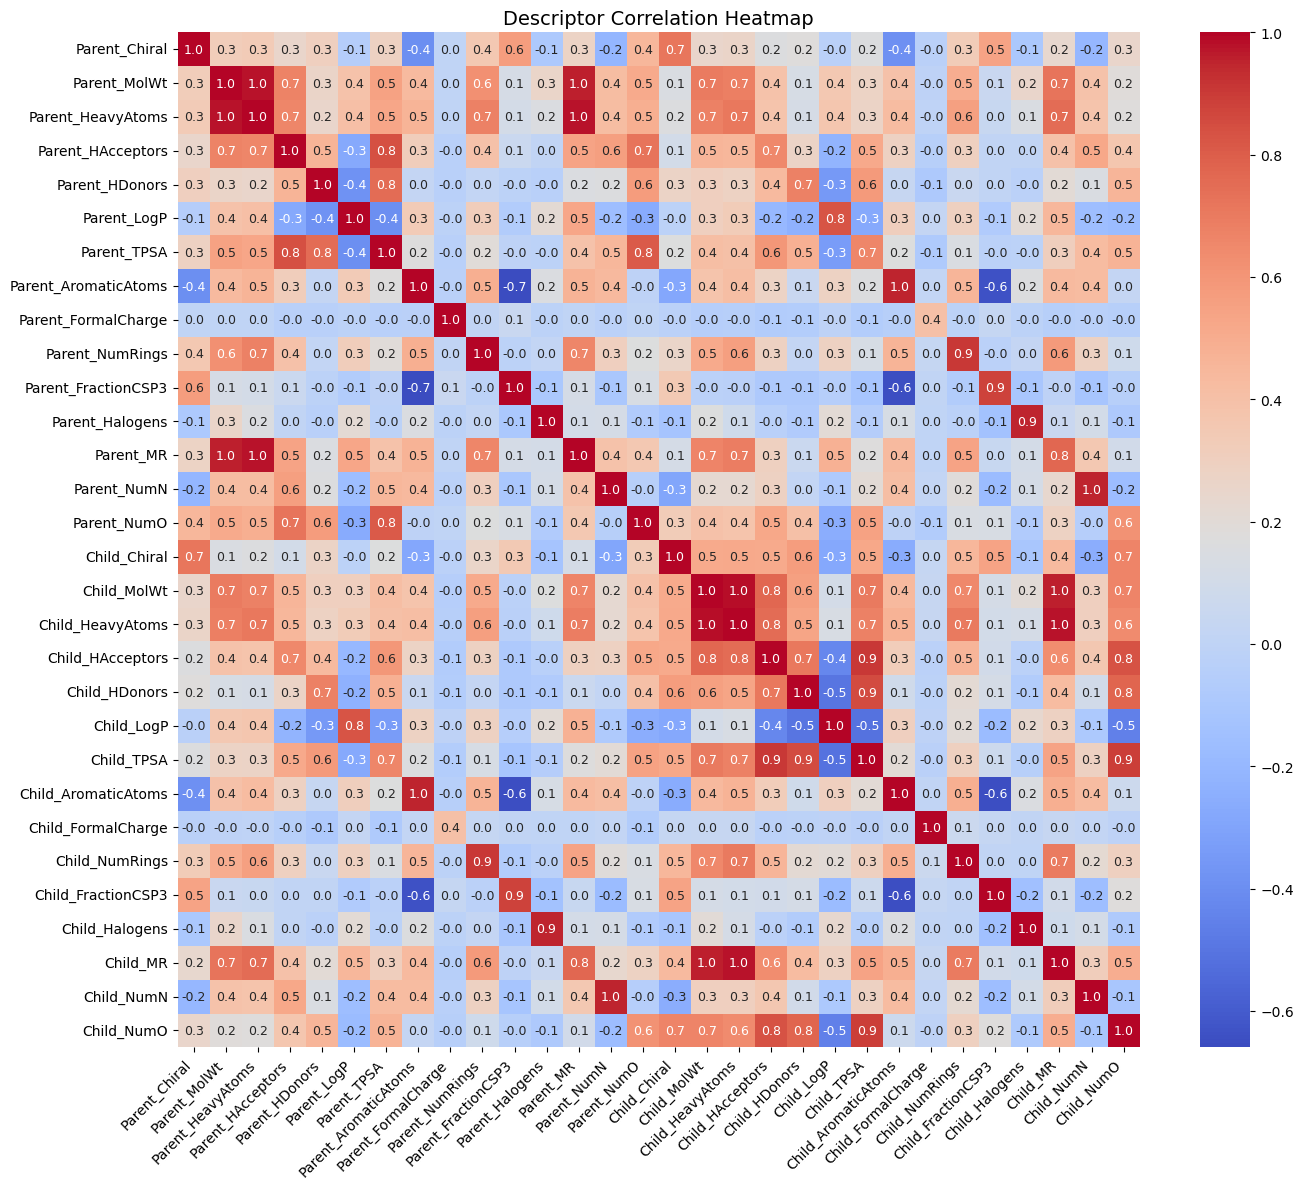

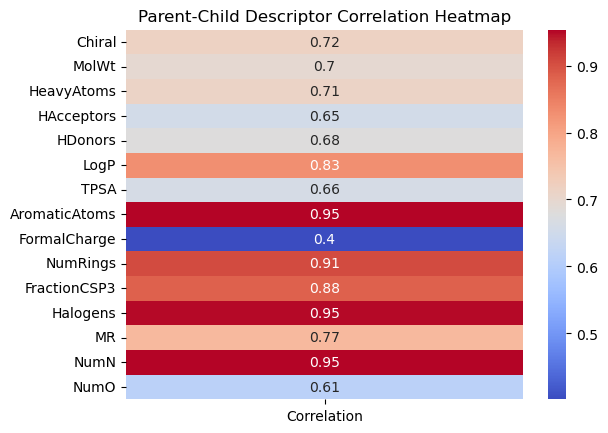

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# def old_determine_descriptor_correlation_all(csv): 
#     df = pd.read_csv(csv)
#     parent_smiles = df["parent_smiles"]
#     child_smiles = df["child_smiles"]

#     parent_descriptors = calculate_descriptors(parent_smiles)
#     child_descriptors = calculate_descriptors(child_smiles)

#     combined_data = pd.concat([parent_descriptors, child_descriptors], axis=1, keys=['Parent', 'Child'])

#     correlation_matrix = combined_data.corr()
#     #Calculate correlation: Only between Parent and Child
#     #correlation_matrix = combined_data['Parent'].corrwith(combined_data['Child'])

#     # Plot heatmap
#     sns.heatmap(
#         correlation_matrix,
#         annot=True,
#         cmap='coolwarm',
#         fmt=".1f",  # Format of the annotation text
#         annot_kws={"size": 5},  # Font size for the annotations
#         # cbar_kws={'shrink': 0.8}  # Size of the colorbar
#     )
#     plt.title("Descriptor Correlation Heatmap")
#     plt.xticks(fontsize=10)  # Smaller font size for tick labels
#     plt.yticks(fontsize=10)
#     #plt.tight_layout()
#     plt.figure(figsize=(16, 14))  # Larger figsize for more space
#     plt.show()

def determine_descriptor_correlation_all(csv):  
    df = pd.read_csv(csv)
    parent_smiles = df["parent_smiles"]
    child_smiles = df["child_smiles"]

    parent_descriptors = calculate_descriptors(parent_smiles)
    child_descriptors = calculate_descriptors(child_smiles)

    combined_data = pd.concat([parent_descriptors, child_descriptors], axis=1, keys=['Parent', 'Child'])

    # Flatten the MultiIndex for the DataFrame column names
    combined_data.columns = [f"{parent}_{child}" for parent, child in combined_data.columns]

    correlation_matrix = combined_data.corr()

    # Plot heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".1f",
        annot_kws={"size": 9}
    )
    plt.title("Descriptor Correlation Heatmap", fontsize=14)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

def determine_descriptor_correlation_parent_child(csv):  
    df = pd.read_csv(csv)
    parent_smiles = df["parent_smiles"]
    child_smiles = df["child_smiles"]

    # Calculate descriptors
    parent_descriptors = calculate_descriptors(parent_smiles)
    child_descriptors = calculate_descriptors(child_smiles)

    # Compute correlation between parent and child descriptors
    correlation_data = parent_descriptors.corrwith(child_descriptors)
    correlation_df = correlation_data.to_frame(name="Correlation")  # Convert to DataFrame for heatmap

    # Plot heatmap
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
    plt.title("Parent-Child Descriptor Correlation Heatmap")
    plt.yticks(rotation=0)
    plt.show()

data_file = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv'
determine_descriptor_correlation_all(data_file)
determine_descriptor_correlation_parent_child(data_file)